<a href="https://colab.research.google.com/github/JALVARADORUIZ/UB_Proyecto/blob/main/Test__CNN__Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import keras
import skimage
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.8.0


In [ ]:
import numpy as np 
import pandas as pd
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import metrics
from sklearn.svm import SVC

from tqdm import tqdm
tqdm.pandas()


dim = 128

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TFM_Máster BDDS/datawine/df_img_processed.csv')
df = df.iloc[:,:15]
df.head(1)

,winery,product,region,country_code,rating,variety,price_usd,image,continente,country_code_clean,price_cat,rating_cat,quality,color,image_clean
0,louis jadot,louis jadot corton grand cru greves 2006,corton grand cru,fr,4.0,pinot noir,89.99,vintage-images/TJyGXkvdQsSBDVqT8hHDtg_pl_480x6...,europe,france,alto,muy bueno,grand cru,red,TJyGXkvdQsSBDVqT8hHDtg_pl_480x640.png


In [ ]:
'''df_variety = df['variety'].value_counts().rename_axis('variety').to_frame('counts')
df_variety_selected = df_variety[:15]
list_variety = list(df_variety_selected.index)

def transform_variety(variety, list_variety):
  if variety in list_variety:
    return variety
  else:
    return "other"

df['variety'] = df.progress_apply(lambda x:transform_variety(x.variety,list_variety), axis=1)'''


'df_variety = df[\'variety\'].value_counts().rename_axis(\'variety\').to_frame(\'counts\')\ndf_variety_selected = df_variety[:15]\nlist_variety = list(df_variety_selected.index)\n\ndef transform_variety(variety, list_variety):\n  if variety in list_variety:\n    return variety\n  else:\n    return "other"\n\ndf[\'variety\'] = df.progress_apply(lambda x:transform_variety(x.variety,list_variety), axis=1)'

In [ ]:
X = df['image_clean'].values

In [ ]:
df['price_cat'].value_counts()

alto     2084
medio    1906
bajo     1467
Name: price_cat, dtype: int64

Encoder:

In [ ]:
price_dict = {'bajo':0, 'medio':1, 'alto':2}
df['price_cat'] = df.price_cat.map(price_dict)

In [ ]:
df['price_cat'].value_counts()

2    2084
1    1906
0    1467
Name: price_cat, dtype: int64

In [ ]:
y = df['price_cat'].values

In [ ]:
X.shape,y.shape

((5457,), (5457,))

In [ ]:
X= np.array(X)
X= X.reshape(-1, 1)

In [ ]:
X.shape

(5457, 1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy="not majority")
X,y = ros.fit_resample(X,y)

In [ ]:
X = X.flatten()

In [ ]:
X.shape, y.shape

((6252,), (6252,))

In [ ]:
'''images = []
path = "/content/drive/MyDrive/TFM_Máster BDDS/datawine/vintage-images/"
for i in X:
  image = cv2.imread(os.path.join(path, i), cv2.IMREAD_COLOR)
  image = cv2.resize(image, (dim, dim))
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  images.append(image)

X = np.array(images)'''

'images = []\npath = "/content/drive/MyDrive/TFM_Máster BDDS/datawine/vintage-images/"\nfor i in X:\n  image = cv2.imread(os.path.join(path, i), cv2.IMREAD_COLOR)\n  image = cv2.resize(image, (dim, dim))\n  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)\n  images.append(image)\n\nX = np.array(images)'

Guardo los features en un objeto numpy

In [ ]:
'''with open('/content/drive/MyDrive/TFM_Máster BDDS/128_features_cnn_price.npy', 'wb') as f:
    np.save(f, X)'''

"with open('/content/drive/MyDrive/TFM_Máster BDDS/128_features_cnn_price.npy', 'wb') as f:\n    np.save(f, X)"

Abro features guardados:

In [ ]:
with open('/content/drive/MyDrive/TFM_Máster BDDS/128_features_cnn_price.npy', 'rb') as f:
    X= np.load(f)

In [ ]:
'''le = OrdinalEncoder() #Cambiamos a ordinalencoder en vez de labelencoder https://sitiobigdata.com/2019/11/22/variables-categoricas-en-aprendizaje-profundo/
y = le.fit(y)
y = le.transform(y)'''

'le = OrdinalEncoder() #Cambiamos a ordinalencoder en vez de labelencoder https://sitiobigdata.com/2019/11/22/variables-categoricas-en-aprendizaje-profundo/\ny = le.fit(y)\ny = le.transform(y)'

In [ ]:
X.shape,y.shape

((6252, 128, 128, 3), (6252,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5001, 128, 128, 3), (1251, 128, 128, 3), (5001,), (1251,))

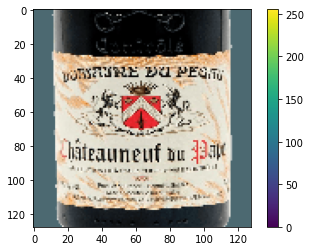

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
X_train = X_train / 255.0

X_test = X_test / 255.0

In [ ]:
'''plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(le.classes_[y_train[i]])
plt.show()'''

'plt.figure(figsize=(10,10))\nfor i in range(25):\n    plt.subplot(5,5,i+1)\n    plt.xticks([])\n    plt.yticks([])\n    plt.grid(False)\n    plt.imshow(X_train[i], cmap=plt.cm.binary)\n    plt.xlabel(le.classes_[y_train[i]])\nplt.show()'

In [ ]:
'''len(le.classes_)'''

'len(le.classes_)'

**Probando Red neuronal Convulsional Simple (Sin Dropout)**

In [ ]:
'''model = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.Flatten(input_shape=(128, 128,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])'''

# We import the data set from tensorflow and build the model there
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [ ]:
'''model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'mse', 'mae'])'''
              
'''model.fit(X_train, y_train, epochs=50)'''

'model.fit(X_train, y_train, epochs=50)'

In [ ]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy','mse', 'mae'])

history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_test, y_test))

Epoch 1/30
157/157 [==============================] - 16s 27ms/step - loss: 1.1071 - accuracy: 0.3585 - mse: 1.7949 - mae: 1.0533 - val_loss: 1.1083 - val_accuracy: 0.3837 - val_mse: 2.1824 - val_mae: 1.2186
Epoch 2/30
157/157 [==============================] - 3s 22ms/step - loss: 1.0679 - accuracy: 0.4229 - mse: 2.1676 - mae: 1.2029 - val_loss: 1.1432 - val_accuracy: 0.3445 - val_mse: 3.0015 - val_mae: 1.4528
Epoch 3/30
157/157 [==============================] - 4s 23ms/step - loss: 1.0156 - accuracy: 0.4745 - mse: 2.4966 - mae: 1.2980 - val_loss: 1.0310 - val_accuracy: 0.4732 - val_mse: 2.5554 - val_mae: 1.3121
Epoch 4/30
157/157 [==============================] - 3s 22ms/step - loss: 0.9307 - accuracy: 0.5597 - mse: 3.2040 - mae: 1.4799 - val_loss: 1.0273 - val_accuracy: 0.5180 - val_mse: 4.1238 - val_mae: 1.6743
Epoch 5/30
157/157 [==============================] - 4s 23ms/step - loss: 0.7989 - accuracy: 0.6323 - mse: 4.3975 - mae: 1.6866 - val_loss: 1.0044 - val_accuracy: 0.5492 

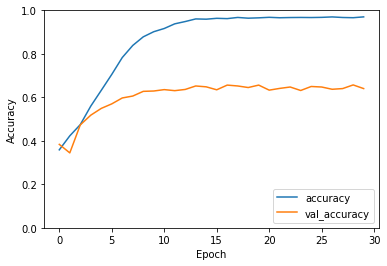

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

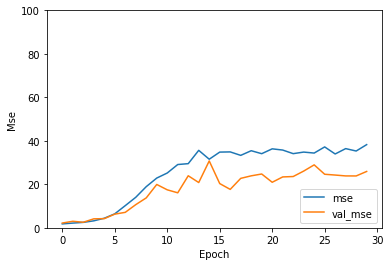

In [ ]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['val_mse'], label = 'val_mse')
plt.xlabel('Epoch')
plt.ylabel('Mse')
plt.ylim([0, 100])
plt.legend(loc='lower right')

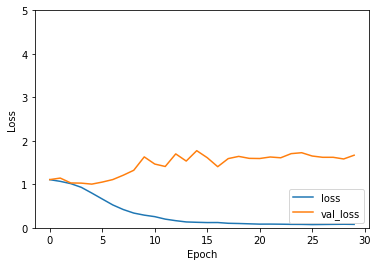

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 5])
plt.legend(loc='lower right')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Test loss: 1.669269323348999
Test accuracy: 0.6402877569198608


In [ ]:
import joblib

joblib.dump(model, '/content/drive/MyDrive/TFM_Máster BDDS/Modelos/modelo_cnn_precio_categorica_v2.pkl')

['/content/drive/MyDrive/TFM_Máster BDDS/Modelos/modelo_cnn_precio_categorica_v2.pkl']

**Red Neuronal Convulsional con Dropout**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.regularizers import l1_l2

model = Sequential()

#### Input Layer ####
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',
                 activation='relu', input_shape=(128, 128, 3)))

#### Convolutional Layers ####
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))  # Pooling
model.add(Dropout(0.2)) # Dropout

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (5,5), padding='same', activation='relu'))
model.add(Conv2D(512, (5,5), activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Dropout(0.2))

#### Fully-Connected Layer ####
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.summary() # a handy way to inspect the architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        36928     
                                                      

In [ ]:
%%time


import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
#from livelossplot import PlotLossesKeras
#from livelossplot.inputs.tf_keras import PlotLossesCallback

BATCH_SIZE = 32
steps_per_epoch = X_train.shape[0] // BATCH_SIZE
val_steps = y_train.shape[0] // BATCH_SIZE

n_epochs = 30

optimizer = RMSprop(learning_rate=0.0001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=optimizer, metrics=['accuracy','mse', 'mae'])

# Saves Keras model after each epoch
checkpointer = ModelCheckpoint(filepath='img_model.weights.best.hdf5', 
                               verbose=1, 
                               save_best_only=True)

# Early stopping to prevent overtraining and to ensure decreasing validation loss
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

# tensorboard_callback = TensorBoard(log_dir="./logs")

# Actual fitting of the model
history = model.fit(X_train,
                    y_train,
                    epochs=n_epochs, 
                    #steps_per_epoch=steps_per_epoch,
                    validation_data=(X_test, y_test),
                    #validation_steps=val_steps,
                    callbacks=[checkpointer],
                    verbose=True)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


157/157 [==============================] - ETA: 0s - loss: 1.1002 - accuracy: 0.3219 - mse: 1.0982 - mae: 0.8832
Epoch 1: val_loss improved from inf to 1.09684, saving model to img_model.weights.best.hdf5
157/157 [==============================] - 17s 92ms/step - loss: 1.1002 - accuracy: 0.3219 - mse: 1.0982 - mae: 0.8832 - val_loss: 1.0968 - val_accuracy: 0.3853 - val_mse: 1.1636 - val_mae: 0.9115
Epoch 2/30
156/157 [============================>.] - ETA: 0s - loss: 1.0861 - accuracy: 0.3876 - mse: 1.1015 - mae: 0.8833
Epoch 2: val_loss improved from 1.09684 to 1.08418, saving model to img_model.weights.best.hdf5
157/157 [==============================] - 13s 82ms/step - loss: 1.0861 - accuracy: 0.3879 - mse: 1.1014 - mae: 0.8832 - val_loss: 1.0842 - val_accuracy: 0.3941 - val_mse: 1.1654 - val_mae: 0.9115
Epoch 3/30
156/157 [============================>.] - ETA: 0s - loss: 1.0745 - accuracy: 0.4125 - mse: 1.1043 - mae: 0.8835
Epoch 3: val_loss did not improve from 1.08418
157/157 [=

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label = 'val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mae')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 5])
plt.legend(loc='lower right')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [47]:
y_pred = model.predict(X_test)

y_test_arg=np.argmax(y_test)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test, Y_pred))
print('Accuracy')
print(accuracy_score(y_test, Y_pred))
print('Recall')
print(recall_score(y_test, Y_pred, pos_label='positive',average='micro'))
print('Precision')
print(precision_score(y_test, Y_pred, pos_label='positive',average='micro'))
print('F1')
print(f1_score(y_test, Y_pred, pos_label='positive',average='micro'))

Confusion Matrix
[[266 137  13]
 [ 57 297  36]
 [ 22 197 226]]
Accuracy
0.6306954436450839
Recall
0.6306954436450839
Precision
0.6306954436450839
F1
0.6306954436450839


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


In [ ]:
import joblib

joblib.dump(model, '/content/drive/MyDrive/TFM_Máster BDDS/Modelos/modelo_cnn_dropout_precio_categorica_v2.pkl')